# tf.keras_extent
##  本讲目标：神经网络八股功能扩展
### •自制数据集，解决本领域应用
### •数据增强，扩充数据集
### •断点续训，存取模型
### •参数提取，把参数存入文本
### •acc/loss可视化，查看训练效果
### •应用程序，给图识物

# 1、自制数据

### （1）选择好数据和路径

In [ ]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os
from matplotlib import pyplot as plt

train_path = '../mnist_image_label/mnist_train_jpg_60000/'
train_txt = '../mnist_image_label/mnist_train_jpg_60000.txt'
x_train_savepath = '../mnist_image_label/mnist_x_train.npy'
y_train_savepath = '../mnist_image_label/mnist_y_train.npy'

test_path = '../mnist_image_label/mnist_test_jpg_10000/'
test_txt = '../mnist_image_label/mnist_test_jpg_10000.txt'
x_test_savepath = '../mnist_image_label/mnist_x_test.npy'
y_test_savepath = '../mnist_image_label/mnist_y_test.npy'


### （2）生成npy文件的函数

In [ ]:
def generateds(path, txt):
    f = open(txt, 'r')  # 以只读形式打开txt文件
    contents = f.readlines()  # 读取文件中所有行
    f.close()  # 关闭txt文件
    x, y_ = [], []  # 建立空列表
    for content in contents:  # 逐行取出
        value = content.split()  # 以空格分开，图片路径为value[0] , 标签为value[1] , 存入列表
        img_path = path + value[0]  # 拼出图片路径和文件名
        img = Image.open(img_path)  # 读入图片
        img = np.array(img.convert('L'))  # 图片变为8位宽灰度值的np.array格式
        img = img / 255.  # 数据归一化 （实现预处理）
        x.append(img)  # 归一化后的数据，贴到列表x
        y_.append(value[1])  # 标签贴到列表y_
        #print('loading : ' + content)  # 打印状态提示

    x = np.array(x)  # 变为np.array格式
    y_ = np.array(y_)  # 变为np.array格式
    y_ = y_.astype(np.int64)  # 变为64位整型
    return x, y_  # 返回输入特征x，返回标签y_

In [ ]:
if os.path.exists(x_train_savepath) and os.path.exists(y_train_savepath) and os.path.exists(
        x_test_savepath) and os.path.exists(y_test_savepath):
    print('-------------Load Datasets-----------------')
    x_train_save = np.load(x_train_savepath)
    y_train = np.load(y_train_savepath)
    x_test_save = np.load(x_test_savepath)
    y_test = np.load(y_test_savepath)
    x_train = np.reshape(x_train_save, (len(x_train_save), 28, 28))
    x_test = np.reshape(x_test_save, (len(x_test_save), 28, 28))
else:
    print('-------------Generate Datasets-----------------')
    x_train, y_train = generateds(train_path, train_txt)
    x_test, y_test = generateds(test_path, test_txt)

    print('-------------Save Datasets-----------------')
    x_train_save = np.reshape(x_train, (len(x_train), -1))
    x_test_save = np.reshape(x_test, (len(x_test), -1))
    np.save(x_train_savepath, x_train_save)
    np.save(y_train_savepath, y_train)
    np.save(x_test_savepath, x_test_save)
    np.save(y_test_savepath, y_test)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

# 2、数据增强   
    image_gen_train=tf.keras.preprocessing.image.ImageDataGenerator(增强方法)
    常用增强方法：
    缩放系数：rescale=所有数据将乘以提供的值
    随机旋转：rotation_range=随机旋转角度数范围
    宽度偏移：width_shift_range=随机宽度偏移量
    高度偏移：height_shift_range=随机高度偏移量
    水平翻转：horizontal_flip=是否水平随机翻转
    随机缩放：zoom_range=随机缩放的范围 [1-n，1+n]
    
    例：image_gen_train = ImageDataGenerator(
            rescale=1./255, #原像素值0～255归至0～1
            rotation_range=45, #随机45度旋转
            width_shift_range=.15, #随机宽度偏移 [-0.15,0.15)
            height_shift_range=.15, #随机高度偏移 [-0.15,0.15)
            horizontal_flip=True, #随机水平翻转
            zoom_range=0.5 #随机缩放到 [1-50％，1+50%]
           
   
   #### 注：1、model.fit(x_train,y_train,batch_size=32,……)变为 model.fit(image_gen_train.flow(x_train, y_train,batch_size=32), ……)；2、数据增强函数的输入要求是4维，通过reshape调整

xtrain (60000, 28, 28, 1)
xtrain_subset1 (12, 28, 28)
xtrain (60000, 28, 28, 1)
xtrain_subset2 (12, 28, 28, 1)


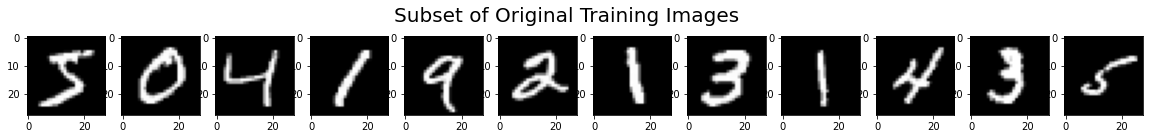

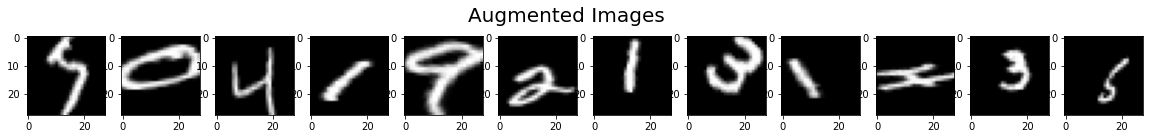

In [2]:
# 显示原始图像和增强后的图像
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

image_gen_train = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=False,
    zoom_range=0.5
)
image_gen_train.fit(x_train)

print("xtrain",x_train.shape)
x_train_subset1 = np.squeeze(x_train[:12])
print("xtrain_subset1",x_train_subset1.shape)
print("xtrain",x_train.shape)
x_train_subset2 = x_train[:12]  # 一次显示12张图片
print("xtrain_subset2",x_train_subset2.shape)

fig = plt.figure(figsize=(20, 2))
plt.set_cmap('gray')
# 显示原始图片
for i in range(0, len(x_train_subset1)):
    ax = fig.add_subplot(1, 12, i + 1)
    ax.imshow(x_train_subset1[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# 显示增强后的图片
fig = plt.figure(figsize=(20, 2))
for x_batch in image_gen_train.flow(x_train_subset2, batch_size=12, shuffle=False):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i + 1)
        ax.imshow(np.squeeze(x_batch[i]))
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;


In [3]:
# 训练模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(image_gen_train.flow(x_train, y_train, batch_size=32), epochs=5, validation_data=(x_test, y_test),
          validation_freq=1)
model.summary()


Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 1.4013 - sparse_categorical_accuracy: 0.5463 - val_loss: 27.9546 - val_sparse_categorical_accuracy: 0.8882
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.9403 - sparse_categorical_accuracy: 0.7135 - val_loss: 29.5988 - val_sparse_categorical_accuracy: 0.9087
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.8112 - sparse_categorical_accuracy: 0.7499 - val_loss: 24.5831 - val_sparse_categorical_accuracy: 0.9223
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.7478 - sparse_categorical_accuracy: 0.7709 - val_loss: 23.3508 - val_sparse_categorical_accuracy: 0.9337
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.7078 - sparse_categorical_accuracy: 0.7850 - val_loss: 32.8005 - val_sparse_categorical_accuracy: 0.9072
Model: "sequential_1"
__________________________________________________________

# 3、断点续训，存取模型
        load_weights(路径文件名)
         
        借助tensorflow给出的回调函数，直接保存参数和网络
            tf.keras.callbacks.ModelCheckpoint( filepath=路径文件名, save_weights_only=True, monitor='val_loss', # val_loss or loss save_best_only=True)
            history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1, callbacks=[cp_callback])

In [4]:
import tensorflow as tf
import os
import numpy as np
np.set_printoptions(threshold=np.inf)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])
checkpoint_save_path = "./checkpoint/mnist.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

-------------load the model-----------------
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0134 - sparse_categorical_accuracy: 0.9959 - val_loss: 0.0876 - val_sparse_categorical_accuracy: 0.9770
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0118 - sparse_categorical_accuracy: 0.9961 - val_loss: 0.0885 - val_sparse_categorical_accuracy: 0.9781
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0098 - sparse_categorical_accuracy: 0.9969 - val_loss: 0.1028 - val_sparse_categorical_accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0096 - sparse_categorical_accuracy: 0.9970 - val_loss: 0.0937 - val_sparse_categorical_accuracy: 0.9771
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0085 - sparse_categorical_accuracy: 0.9973 - val_loss: 0.0914 - val_sparse_categorical_accuracy: 0.9774
Model: "sequential_2"
____________________________

# 4、参数提取，写至文本
   ## 4.1、提取可训练参数
        model.trainable_variables模型中可训练的参数
   ## 4.2、设置print输出格式
        np.set_printoptions(precision=小数点后按四舍五入保留几位,threshold=数组元素数量少于或等于门槛值，打印全部元素；否则打印门槛值+1个元素，中间用省略号补充)
    >>> np.set_printoptions(precision=5)
    >>> print(np.array([1.123456789]))
            [1.12346]
    >>> np.set_printoptions(threshold=5)
    >>> print(np.arange(10))
            [0 1 2 … , 7 8 9]
    注：precision=np.inf打印完整小数位；threshold=np.nan打印全部数组元素。

In [5]:
# 接着上面的模型输出
#print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

# 5、acc/loss可视化，查看效果
   ## 5.1、acc曲线与loss曲线
    history=model.fit(训练集数据, 训练集标签, batch_size=, epochs=,
    validation_split=用作测试数据的比例,validation_data=测试集, validation_freq=测试频率)
    history：
    loss：训练集loss
    val_loss：测试集loss
    sparse_categorical_accuracy：训练集准确率
    val_sparse_categorical_accuracy：测试集准确率

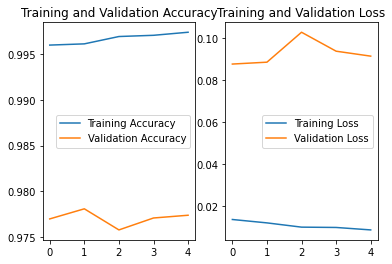

In [6]:
# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# 6、应用程序，给图识物
    前向传播执行应用
    predict(输入数据, batch_size=整数) 返回前向传播计算结果
    (1)x：输入数据，Numpy 数组（或者 Numpy 数组的列表，如果模型有多个输出）；
    (2)batch_size：整数，由于GPU的特性，batch_size最好选用8，16，32，64……，如果未指定，默认为32；(3)verbose: 日志显示模式，0或1；(4)steps: 声明预测结束之前的总步数（批次样本），默认值 None；(5)返回：预测的 Numpy 数组（或数组列表）
    
#### 复现模型：model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(128, activation='relu'),tf.keras.layers.Dense(10, activation='softmax’)])
#### 加载参数：model.load_weights(model_save_path)
#### 预测结果：result = model.predict(x_predict)

In [1]:
from PIL import Image
import numpy as np
import tensorflow as tf

model_save_path = './checkpoint/mnist.ckpt'

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

model.load_weights(model_save_path)

preNum = int(input("input the number of test pictures:"))

for i in range(preNum):
    image_path = input("the path of test picture:")
    img = Image.open(image_path)
    img = img.resize((28, 28), Image.ANTIALIAS)
    img_arr = np.array(img.convert('L'))

    for i in range(28):
        for j in range(28):
            if img_arr[i][j] < 200:
                img_arr[i][j] = 255
            else:
                img_arr[i][j] = 0

    img_arr = img_arr / 255.0
    x_predict = img_arr[tf.newaxis, ...]
    result = model.predict(x_predict)

    pred = tf.argmax(result, axis=1)

    print('\n')
    tf.print(pred)

input the number of test pictures:10
the path of test picture:0.png


[0]
the path of test picture:1.png


[1]
the path of test picture:2.png


[7]
the path of test picture:3.png


[3]
the path of test picture:4.png


[4]
the path of test picture:5.png


[3]
the path of test picture:6.png


[6]
the path of test picture:7.png


[7]
the path of test picture:8.png


[8]
the path of test picture:9.png


[9]
